# Plotting Lab

In the `datasets/` folder in this notebook you will find the `salary` dataset.

- `salary.csv` -- a dataset comparing salary data across gender and tenure lines for academics 

Your task is to use Matplotlib and Seaborn to create high-quality plots for this dataset. 

**Your deliverable for this lab is to push a completed version to your Github Enterprise account by Wednesday. This is a requireed homework assignment.**

Part of effective data science work is to be able to take new datasets and investigate them for interesting correlations or relationships that might be the basis of future research or investigation. Take this lab as an opportunity to practice those skills as well and how plotting can help you in that goal!

##### Useful Workflow Tips

1. Open the data and do a quick EDA:
  - How many rows and columns?
  - Is there missing data?
  - What do each of the columns mean?
    - Sometimes it may not be clear at first glance so double check
    - Googling for some insight into that domain (such as salary information for the academic world) is not just highly encouraged, but may be 100% required in some cases
  - At first glance, are there columns that you think might have an interesting relationship?
2. Begin plotting:
  - If a variable of interest is encoded as a string, do some feature extraction / transformation to turn it into numeric values
  - Use something like seaborn's pairplot to visualize overall relationships
  - Start digging into bivariate (involving or depending on two variables) relationships
3. Refine plots:
  - Try different plotting types / plotting options to create accurate and interesting plots
  - Remember to include titles, axes labels, etc.
  - **Does your plot have a story? What should a reader take away from your plot?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Salary

In [2]:
salary = pd.read_csv('datasets/salary.csv')
salary.head(20)

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696
5,male,full,16,doctorate,21,28516
6,female,full,0,masters,32,24900
7,male,full,16,doctorate,18,31909
8,male,full,13,masters,30,31850
9,male,full,13,masters,31,32850


`1. How many rows and columns?`

In [3]:
salary.shape

(52, 6)

`2. Check for missing values`

In [4]:
salary.isnull().sum()
# no null values 

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

`3. Review datatypes for each column in your dataframe. Per the instructions above, convert any as needed.`

In [5]:
salary.dtypes


sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

In [6]:
#change sl column  to float 
salary.sl=salary.sl.astype(float)


In [7]:
salary.dtypes

sx     object
rk     object
yr      int64
dg     object
yd      int64
sl    float64
dtype: object

In [8]:
salary.describe()

,yr,yd,sl
count,52.000000,52.000000,52.000000
mean,7.480769,16.115385,23797.653846
std,5.507536,10.222340,5917.289154
min,0.000000,1.000000,15000.000000
25%,3.000000,6.750000,18246.750000
50%,7.000000,15.500000,23719.000000
75%,11.000000,23.250000,27258.500000
max,25.000000,35.000000,38045.000000


`4. Visualize the distributions of the series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`

histogram is best used to graphically summarize and display the distribution of a data set . Also, joint plot is used
to show distribution and relation between the years and salary

`4a.`

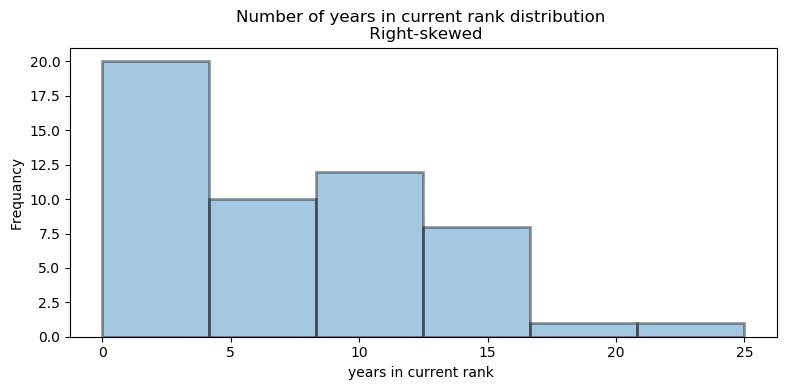

In [9]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax1=sns.distplot(salary.yr, kde=False,hist_kws=dict(edgecolor="black", linewidth=2))
ax1.set(xlabel='years in current rank ', ylabel='Frequancy')
ax1.set_title('Number of years in current rank distribution \n Right-skewed')
plt.tight_layout()


`4b.`

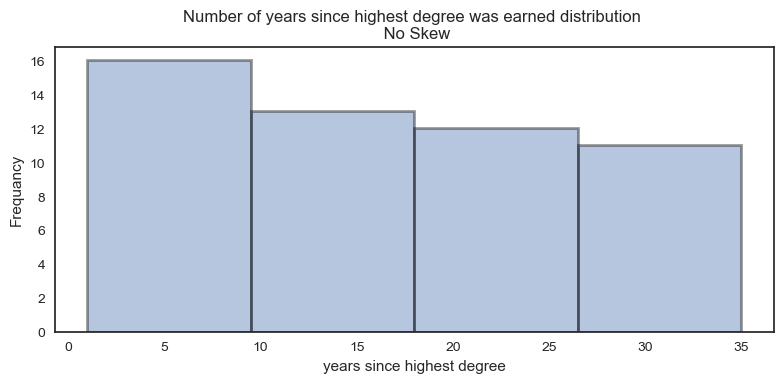

In [144]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax2=sns.distplot(salary.yd,kde=False,hist_kws=dict(edgecolor="black", linewidth=2))
ax2.set(xlabel='years since highest degree', ylabel='Frequancy')
ax2.set_title('Number of years since highest degree was earned distribution \n No Skew')
plt.tight_layout()

`4c.`

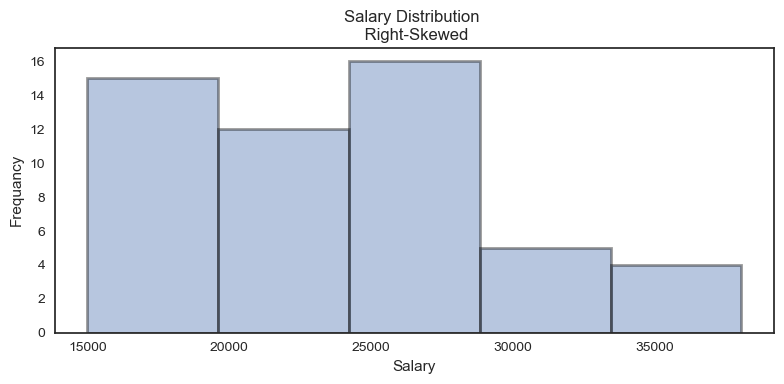

In [146]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax3=sns.distplot(salary.sl,kde=False,hist_kws=dict(edgecolor="black", linewidth=2))
ax3.set(xlabel='Salary', ylabel='Frequancy')
ax3.set_title('Salary Distribution \n Right-Skewed')
plt.tight_layout()

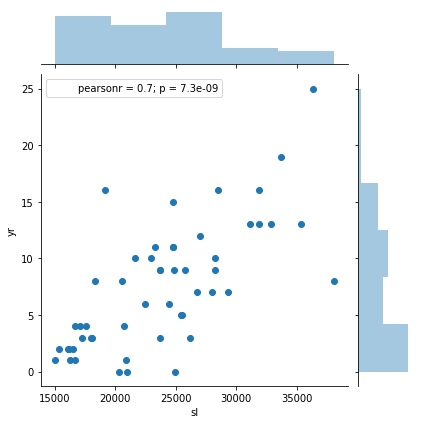

In [10]:
sns.jointplot(x='sl',y='yr',data=salary,kind='scatter');

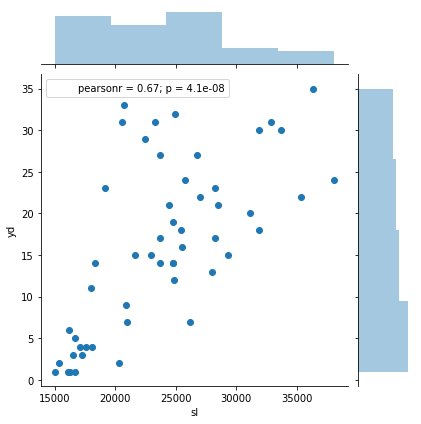

In [11]:
sns.jointplot(x='sl',y='yd',data=salary,kind='scatter');

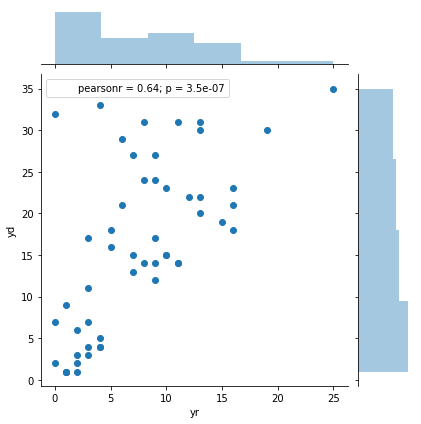

In [12]:
sns.jointplot(x='yr',y='yd',data=salary,kind='scatter');

`4d. BONUS: Include the skew of each continuous variable distribution in the title of the plot.`

included in title

`5. Visualize the relationships between series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`

Scatter plot and Hex plot are appropriate for visualizing relationships between variables

`5a.`

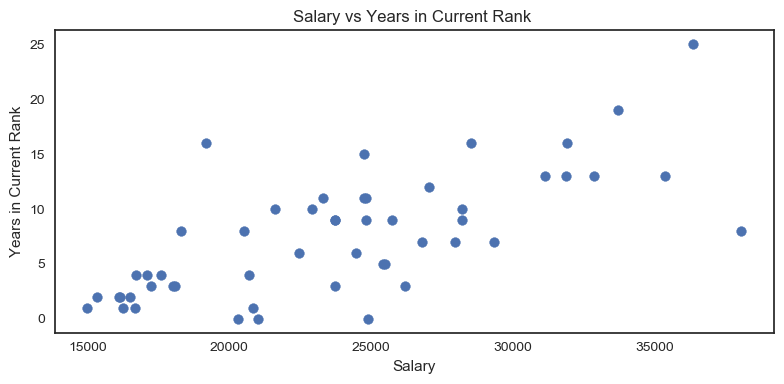

In [173]:
fig=plt.figure(figsize=(8,4), dpi=100)
plt.scatter(salary.sl,salary.yr)
plt.xlabel('Salary')
plt.ylabel('Years in Current Rank')
plt.title('Salary vs Years in Current Rank ')
plt.tight_layout()

`5b.`

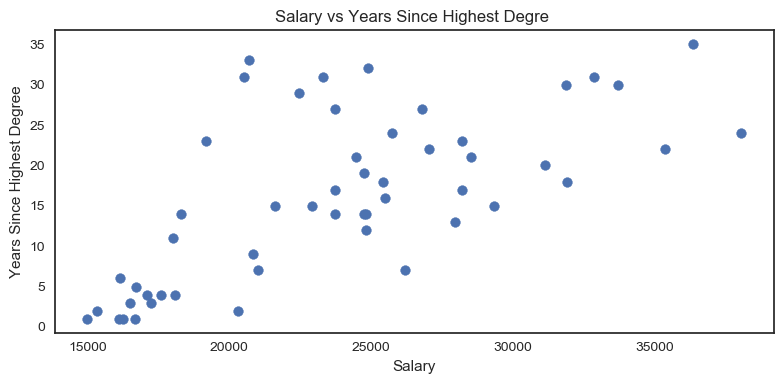

In [174]:
fig=plt.figure(figsize=(8,4), dpi=100)
plt.scatter(salary.sl,salary.yd)
plt.xlabel('Salary')
plt.ylabel('Years Since Highest Degree')
plt.title('Salary vs Years Since Highest Degre ')
plt.tight_layout()

`5c.`

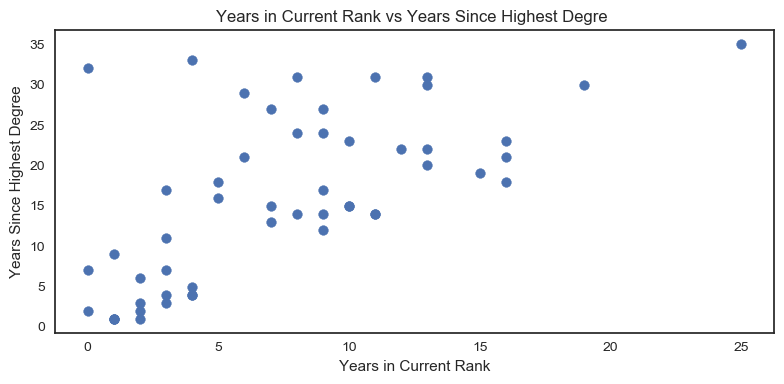

In [175]:

fig=plt.figure(figsize=(8,4), dpi=100)
plt.scatter(salary.yr,salary.yd)
plt.xlabel('Years in Current Rank')
plt.ylabel('Years Since Highest Degree')
plt.title('Years in Current Rank vs Years Since Highest Degre ')
plt.tight_layout()

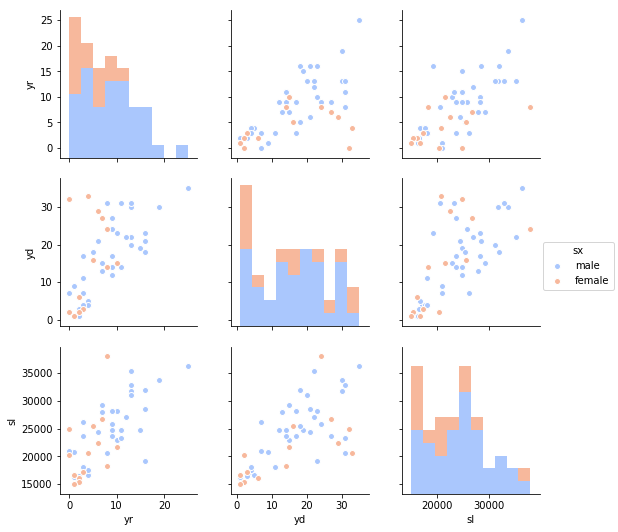

In [13]:
#another way to check relation . hue is used to check for sx categoral relation
sns.pairplot(salary,hue='sx',palette='coolwarm');

`5d. Save at least one plot as a png file.`

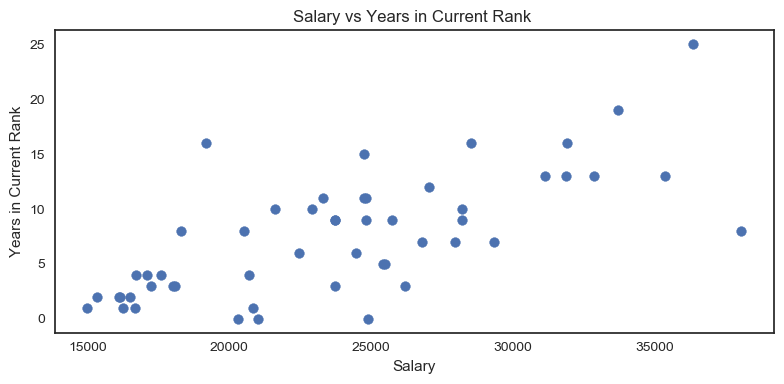

In [176]:
fig=plt.figure(figsize=(8,4), dpi=100)
plt.scatter(salary.sl,salary.yr)
plt.xlabel('Salary')
plt.ylabel('Years in Current Rank')
plt.title('Salary vs Years in Current Rank ')
plt.tight_layout()
fig.savefig("relation.png")

`6. Check for correlation between variables in your dataframe.`

In [177]:
salary.corr()

,yr,yd,sl
yr,1.000000,0.638776,0.700669
yd,0.638776,1.000000,0.674854
sl,0.700669,0.674854,1.000000


`7. Now visualize that correlation output:`

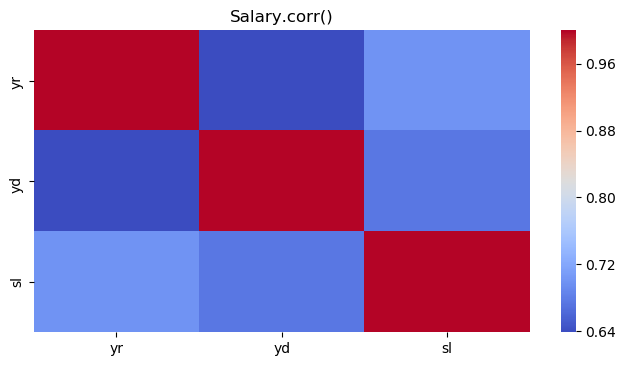

In [14]:
fig=plt.figure(figsize=(8,4), dpi=100);
sns.heatmap(salary.corr(),cmap='coolwarm');
plt.title('Salary.corr()');

`8. Write up a paragraph or two to explain the plot choices you made earlier in the notebook.
Additionally, explain what you've learned about this dataset comparing salary data across gender and tenure lines for academics.`

Seaborn Histogram was used to graphically summarize and display the distribution of the data set. Also, joint plot was used to show distribution and relation between the years and salary. Matplot scatter was used to check for relationships between the variables. Seaborn pair plot was also used to check for relation across the gender. Finally, seaborn heatmap was used for correlation check.



1-There is a positive correlation between salaries and the number of years in current rank for males. For females, its usually not the case

2-There is a positive correlation between salaries and the number of years since highest degree was earned for males. For females, its usually not the case

3- There are higher number of males than females in this academic dataset
